Grid shape: (24, 360)
Bx: -16.05
By: -34.42
Bz: 10.34
Vsw: -700.5


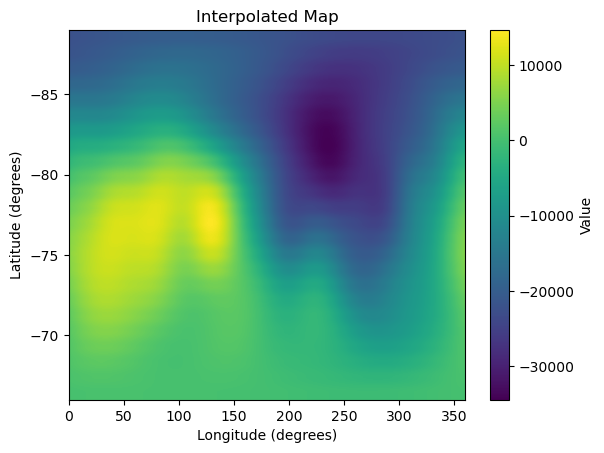

/tmp/ipykernel_21521/654174196.py:74: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='plasma')


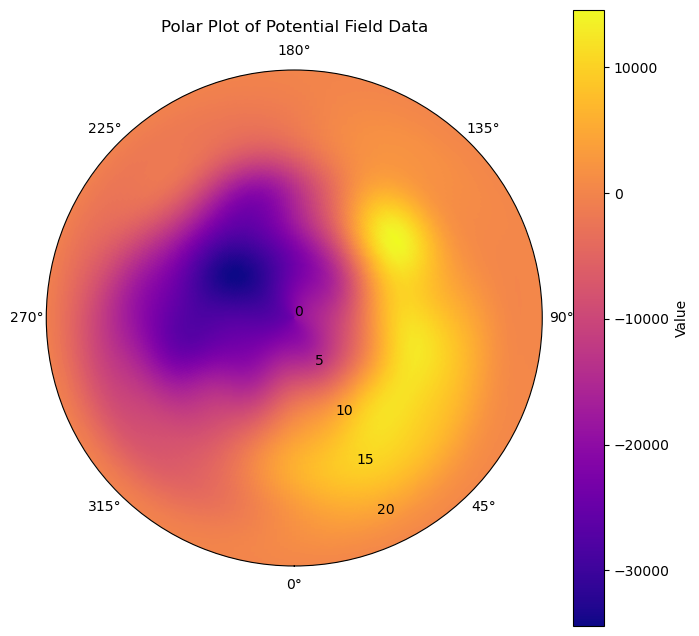

In [1]:
#Testing stuff 

import os
import numpy as np
import pickle

npy_path = "/home/simone/Downloads/pickled_maps/"
npy_file = "map_2024_5_11_5_0_0.npy"
npy_path = os.path.join(npy_path, npy_file)

# Latitude and longitude settings
lat_start, lat_end, lat_step = -66, -89, -1
lon_step = 2  # Original step

with open(npy_path, "rb") as f:
    data = pickle.load(f)
    grid_2d = data[0]
    bx, by, bz, vsw = data[1], data[2], data[3], data[4]
    print("Grid shape:", grid_2d.shape)
    print("Bx:", bx)
    print("By:", by)
    print("Bz:", bz)
    print("Vsw:", vsw)

import matplotlib.pyplot as plt

plt.imshow(grid_2d, aspect='auto', extent=[0, 360, lat_start, lat_end], origin='lower')
plt.colorbar(label='Value')
plt.title('Interpolated Map')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()


#=== LAT/LON GRID ===
n_lat, n_lon = grid_2d.shape
latitudes = np.linspace(-66, -89, n_lat)
longitudes = np.linspace(0, 360, n_lon, endpoint=False)

#Convert to polar coordinates
mag_lon_deg = longitudes
mag_lat_deg = latitudes[:, None]  # shape (n_lat, 1), broadcastable

theta = np.deg2rad(mag_lon_deg)           # shape (n_lon,)
r = 89 - np.abs(mag_lat_deg)              # shape (n_lat, 1) #take care to the 89 for visualization

#Create 2D meshgrid for plotting
#theta_grid, r_grid = np.meshgrid(theta, r)
# Optional: create a grid if data is regular

from scipy.interpolate import griddata

# Create polar grid
r_i = np.linspace(r.min(), r.max(), 200)
theta_i = np.linspace(0, 2 * np.pi, 360)
r_grid, theta_grid = np.meshgrid(r_i, theta_i)

# Flatten r and repeat it to match the size of theta
r_flat = np.repeat(r.flatten(), theta.size)

# Tile theta to match the size of r
theta_tiled = np.tile(theta, r.size)

# Combine r and theta into points
points = np.column_stack((r_flat, theta_tiled))

# Interpolate values onto grid
grid_values = griddata(points, grid_2d.flatten(), (r_grid, theta_grid), method='linear')

#=== PLOT ===
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='plasma')

ax.set_theta_zero_location("S")  # 0° at the bottom
ax.set_theta_direction(1)       # Clockwise
ax.set_title("Polar Plot of Potential Field Data", va='bottom')
plt.colorbar(c, label="Value")

plt.show()



<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_21521/2664220313.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/2664220313.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/2664220313.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/2664220313.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two mi

23.0


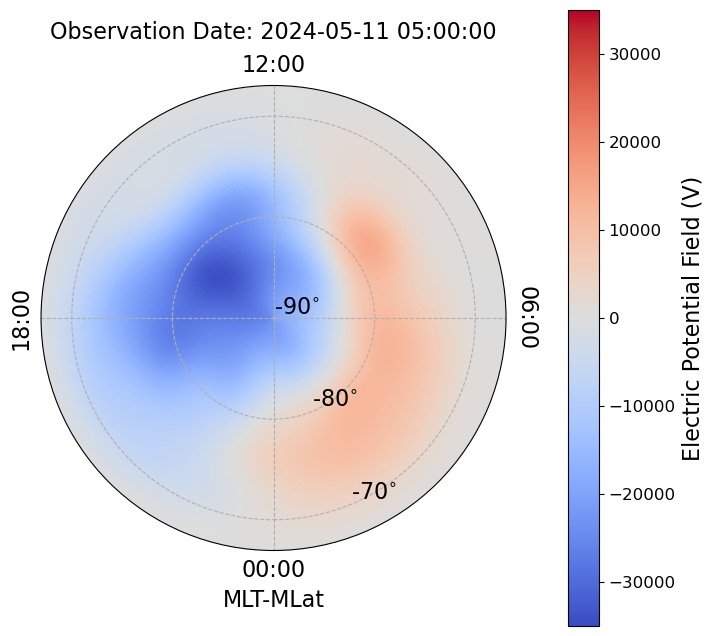

In [2]:
#=== PLOT ===

print(np.max(r_i))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='coolwarm', vmin=-35000, vmax=35000)

# Add grid in the background
ax.grid(True, linestyle='--')

# Update title to include the date of observation
observation_date = "2024-05-11 05:00:00"  # Extracted from the filename
ax.set_title(f"Observation Date: {observation_date}", va='bottom', fontsize=16, pad=30)

text_radius = 25
axis_raidus = 28


plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 16)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 16)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 16)
plt.text(np.radians(0), axis_raidus , 'MLT-MLat', ha = 'center', va = 'center', fontsize = 16)

ax.set_theta_zero_location("S")  # 0° at the bottom
ax.set_theta_direction(1)       # Clockwise

# Adjust colorbar
cbar = plt.colorbar(c, ax=ax, pad=0.1, label="Value")
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Electric Potential Field (V)", fontsize=16)

plt.show()


<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_21521/1851327881.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/1851327881.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/1851327881.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/1851327881.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two mi

23.0


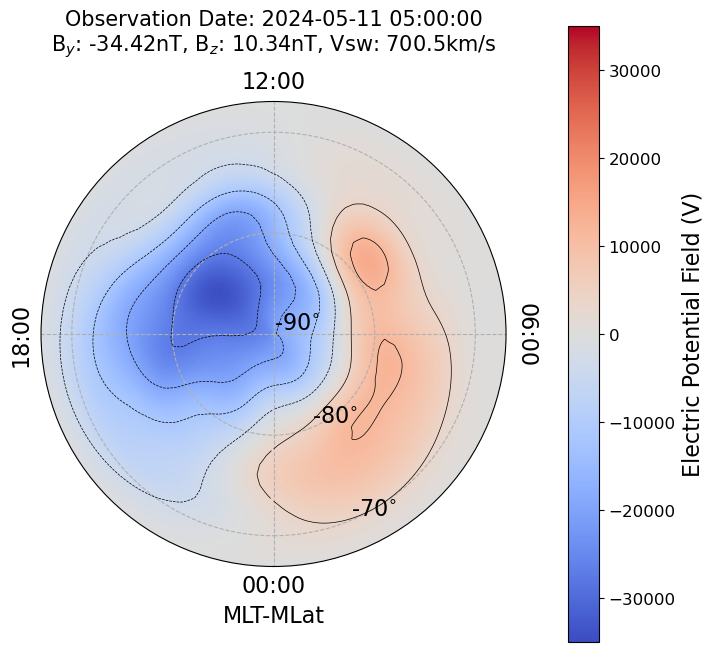

In [3]:
#=== PLOT WITH CONTOURS ===

print(np.max(r_i))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plot the data as a color mesh
c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='coolwarm', vmin=-35000, vmax=35000)

# Add contours to the plot
contour_levels = np.linspace(-35000, 35000, 10)  # Define contour levels
contours = ax.contour(theta_grid, r_grid, grid_values, levels=contour_levels, colors='black', linewidths=0.5)

# Add grid in the background
ax.grid(True, linestyle='--')

# Update title to include the date of observation and unused conditions
observation_date = "2024-05-11 05:00:00"  # Extracted from the filename
ax.set_title(f"Observation Date: {observation_date}\nB$_y$: {by}nT, B$_z$: {bz}nT, Vsw: {np.abs(vsw)}km/s", 
             va='bottom', fontsize=15, pad=30)

text_radius = 25
axis_raidus = 28

plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 16)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 16)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 16)
plt.text(np.radians(0), axis_raidus , 'MLT-MLat', ha = 'center', va = 'center', fontsize = 16)

ax.set_theta_zero_location("S")  # 0° at the bottom
ax.set_theta_direction(1)       # Clockwise

# Adjust colorbar
cbar = plt.colorbar(c, ax=ax, pad=0.1, label="Value")
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Electric Potential Field (V)", fontsize=16)

#save the fig as a pdf
fig.savefig("polar_plot_with_contours.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()

In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime, time

# === Paths ===
npy_path = "/home/simone/Downloads/pickled_maps/"
output_dir = "/home/simone/Downloads/plots_20240511_12to18_every10/"
os.makedirs(output_dir, exist_ok=True)

# Target day in filenames
target_day = "2024_5_11"

# Time window
start_time = time(12, 0, 0)
end_time   = time(18, 0, 0)

# Custom timestamp parser
def parse_timestamp(ts):
    parts = ts.split("_")   # e.g. ['2024','5','11','12','10','0']
    year, month, day, hour, minute, second = map(int, parts)
    return datetime(year, month, day, hour, minute, second)

# === Collect files ===
files = [f for f in os.listdir(npy_path) if f.endswith(".npy") and target_day in f]
files.sort()
print("Found files:", len(files))

for fname in files:
    ts = fname.replace("map_", "").replace(".npy", "")
    try:
        dt = parse_timestamp(ts)
    except Exception as e:
        print(f"Skipping {fname}, parse failed: {e}")
        continue

    # Only keep between 12:00 and 18:00
    if not (start_time <= dt.time() <= end_time):
        continue

    # Only keep if minute is multiple of 10
    if dt.minute % 10 != 0:
        continue

    print("Processing:", fname, "->", dt)

    # === Load data ===
    with open(os.path.join(npy_path, fname), "rb") as f:
        grid_2d, bx, by, bz, vsw = pickle.load(f)

    # === Build polar grid ===
    n_lat, n_lon = grid_2d.shape
    print("Grid shape:", grid_2d.shape)
    latitudes = np.linspace(-66, -89, n_lat)
    longitudes = np.linspace(0, 360, n_lon, endpoint=False)

    theta = np.deg2rad(longitudes)
    r = 89 - np.abs(latitudes[:, None])

    r_i = np.linspace(r.min(), r.max(), 200)
    theta_i = np.linspace(0, 2*np.pi, 360)
    r_grid, theta_grid = np.meshgrid(r_i, theta_i)

    r_flat = np.repeat(r.flatten(), theta.size)
    theta_tiled = np.tile(theta, r.size)
    points = np.column_stack((r_flat, theta_tiled))
    grid_values = griddata(points, grid_2d.flatten(),
                           (r_grid, theta_grid), method="linear")

    # === Plot ===
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    c = ax.pcolormesh(theta_grid, r_grid, grid_values,
                      shading="auto", cmap="coolwarm",
                      vmin=-35000, vmax=35000)

    ax.contour(theta_grid, r_grid, grid_values,
               levels=np.linspace(-35000, 35000, 10),
               colors="black", linewidths=0.5)

    ax.set_theta_zero_location("S")
    ax.set_theta_direction(1)
    ax.set_title(f"Observation: {dt.strftime('%Y-%m-%d %H:%M:%S')}\n"
                 f"B$_x$: {bx} nT, B$_z$: {bz} nT, Vsw: {abs(vsw)} km/s",
                 va="bottom", fontsize=14, pad=30)
    
    plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 14)
    plt.xticks(np.radians([0, 90, 180, 270]), ['0°', '90°', '180°', '270°'], fontsize = 14)
    ax.grid(True, linestyle='--')
    
    # Adjust colorbar
    cbar = plt.colorbar(c, ax=ax, pad=0.1, label="Value")
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label("Electric Potential Field (V)", fontsize=16)

    # Save
    outname = os.path.join(output_dir, f"plot_{dt.strftime('%H%M')}.png")
    plt.savefig(outname, dpi=200, bbox_inches="tight")
    plt.close(fig)

    print("Saved:", outname)

print("All plots completed")


<>:90: SyntaxWarning: invalid escape sequence '\c'
<>:90: SyntaxWarning: invalid escape sequence '\c'
<>:90: SyntaxWarning: invalid escape sequence '\c'
<>:90: SyntaxWarning: invalid escape sequence '\c'
<>:90: SyntaxWarning: invalid escape sequence '\c'
<>:90: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_4770/52207307.py:90: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 14)
/tmp/ipykernel_4770/52207307.py:90: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 14)
/tmp/ipykernel_4770/52207307.py:90: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 14)


Found files: 719
Processing: map_2024_5_11_12_0_0.npy -> 2024-05-11 12:00:00
Grid shape: (24, 360)


/tmp/ipykernel_4770/52207307.py:76: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(theta_grid, r_grid, grid_values,


Saved: /home/simone/Downloads/plots_20240511_12to18_every10/plot_1200.png
Processing: map_2024_5_11_12_10_0.npy -> 2024-05-11 12:10:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10/plot_1210.png
Processing: map_2024_5_11_12_20_0.npy -> 2024-05-11 12:20:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10/plot_1220.png
Processing: map_2024_5_11_12_30_0.npy -> 2024-05-11 12:30:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10/plot_1230.png
Processing: map_2024_5_11_12_40_0.npy -> 2024-05-11 12:40:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10/plot_1240.png
Processing: map_2024_5_11_12_50_0.npy -> 2024-05-11 12:50:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10/plot_1250.png
Processing: map_2024_5_11_13_0_0.npy -> 2024-05-11 13:00:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10

In [6]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
from scipy.interpolate import griddata

# === Paths ===
npy_path = "/home/simone/Downloads/filecheck/filtered_npy/"
output_dir = "/home/simone/Downloads/plots_20240511_12to18_every10_new/"
os.makedirs(output_dir, exist_ok=True)

# Target day in filenames
target_day = "2024_1_1"

# Time window
start_time = time(0, 0, 0)
end_time   = time(6, 0, 0)

# --- Custom timestamp parser ---
def parse_timestamp(ts):
    parts = ts.split("_")   # e.g. ['2024','5','11','12','10','0']
    year, month, day, hour, minute, second = map(int, parts)
    return datetime(year, month, day, hour, minute, second)

# --- Collect files ---
files = [f for f in os.listdir(npy_path) if f.endswith(".npy") and target_day in f]
files.sort()
print("Found files:", len(files))

# --- Fixed polar grid parameters ---
n_r = 200
n_theta = 360
lat_start, lat_end = -66, -89
latitudes = np.arange(lat_start, lat_end - 1, -1)

for fname in files:
    ts = fname.replace("map_", "").replace(".npy", "")
    try:
        dt = parse_timestamp(ts)
    except Exception as e:
        print(f"Skipping {fname}, parse failed: {e}")
        continue

    # Time selection
    if not (start_time <= dt.time() <= end_time):
        continue
    if dt.minute % 10 != 0:
        continue

    print("Processing:", fname, "->", dt)

    # --- Load grid data ---
    with open(os.path.join(npy_path, fname), "rb") as f:
        grid_2d = pickle.load(f)
        print("Grid shape:", grid_2d.shape)

    # --- Build polar coordinates ---
    n_lat, n_lon = grid_2d.shape
    r = 89 - np.abs(latitudes[:, None])            # radius: 90° at center
    theta = np.deg2rad(np.linspace(0, 360, n_lon, endpoint=False))  # 0–360°

    # --- Flatten and wrap for seamless interpolation ---
    r_flat = np.repeat(r.flatten(), theta.size)
    theta_tiled = np.tile(theta, r.size)
    points = np.column_stack((r_flat, theta_tiled))
    values_flat = grid_2d.flatten()

    # Interpolation grid
    r_i = np.linspace(r.min(), r.max(), n_r)
    theta_i = np.linspace(0, 2*np.pi, n_theta, endpoint=False)

    # Interpolate onto polar mesh
    r_grid, theta_grid = np.meshgrid(r_i, theta_i, indexing='ij')
    grid_values = griddata(points, values_flat, (r_grid, theta_grid), method="linear")

    # Fill missing values
    if np.isnan(grid_values).any():
        grid_values_nn = griddata(points, values_flat, (r_grid, theta_grid), method="nearest")
        grid_values[np.isnan(grid_values)] = grid_values_nn[np.isnan(grid_values)]

    # --- Wrap 0°/360° seam ---
    grid_values_wrapped = np.hstack([grid_values, grid_values[:, [0]]])  # duplicate first column
    theta_wrapped = np.linspace(0, 2*np.pi, grid_values_wrapped.shape[1], endpoint=True)
    r_grid_wrapped, theta_grid_wrapped = np.meshgrid(r_i, theta_wrapped, indexing='ij')

    # --- Plot ---
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    c = ax.pcolormesh(theta_grid_wrapped, r_grid_wrapped, grid_values_wrapped,
                      shading="auto", cmap="coolwarm", vmin=-35000, vmax=35000)

    ax.contour(theta_grid_wrapped, r_grid_wrapped, grid_values_wrapped,
               levels=np.linspace(-35000, 35000, 10),
               colors="black", linewidths=0.5)

    ax.set_theta_zero_location("S")
    ax.set_theta_direction(1)
    text_radius = 25
    axis_raidus = 28

    plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
    plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 16)
    plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 16)
    plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 16)
    plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 16)
    plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 16)
    plt.text(np.radians(0), axis_raidus , 'MLT-MLat', ha = 'center', va = 'center', fontsize = 16)

    # Adjust colorbar
    cbar = plt.colorbar(c, ax=ax, pad=0.1, label="Value")
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label("Electric Potential Field (V)", fontsize=16)

    # --- Save figure ---
    outname = os.path.join(output_dir, f"plot_{dt.strftime('%H%M')}.png")
    plt.savefig(outname, dpi=200, bbox_inches="tight")
    plt.close(fig)

    print("Saved:", outname)

print("All plots completed")



<>:103: SyntaxWarning: invalid escape sequence '\c'
<>:103: SyntaxWarning: invalid escape sequence '\c'
<>:103: SyntaxWarning: invalid escape sequence '\c'
<>:103: SyntaxWarning: invalid escape sequence '\c'
<>:103: SyntaxWarning: invalid escape sequence '\c'
<>:103: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_21521/4194540297.py:103: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/4194540297.py:103: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_21521/4194540297.py:103: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)


Found files: 13
Processing: map_2024_1_1_0_0_0.npy -> 2024-01-01 00:00:00
Grid shape: (24, 360)


/tmp/ipykernel_21521/4194540297.py:91: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(theta_grid_wrapped, r_grid_wrapped, grid_values_wrapped,


Saved: /home/simone/Downloads/plots_20240511_12to18_every10_new/plot_0000.png
Processing: map_2024_1_1_0_30_0.npy -> 2024-01-01 00:30:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10_new/plot_0030.png
Processing: map_2024_1_1_1_0_0.npy -> 2024-01-01 01:00:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10_new/plot_0100.png
Processing: map_2024_1_1_1_30_0.npy -> 2024-01-01 01:30:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10_new/plot_0130.png
Processing: map_2024_1_1_2_0_0.npy -> 2024-01-01 02:00:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10_new/plot_0200.png
Processing: map_2024_1_1_2_30_0.npy -> 2024-01-01 02:30:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to18_every10_new/plot_0230.png
Processing: map_2024_1_1_3_0_0.npy -> 2024-01-01 03:00:00
Grid shape: (24, 360)
Saved: /home/simone/Downloads/plots_20240511_12to